In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import metrics
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness

In [2]:
##Load datasets
with open('dat/dfmain.pkl', 'rb') as pickle_file:
    dfmain = pickle.load(pickle_file) 
with open('dat/dfaequi.pkl', 'rb') as pickle_file:
    dfaequi = pickle.load(pickle_file) 

In [21]:
###compute ROC and AUC of SAVRY score
fpr, tpr, thresholds = metrics.roc_curve(dfaequi.label_value, dfaequi.full_score, pos_label=1)
auc = metrics.auc(fpr, tpr)

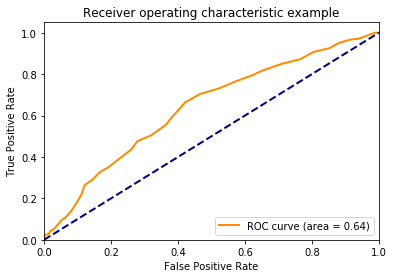

In [23]:
###Compute ROC curve for SAVRY score
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()